# INF - 0295 – **Introdução à Inteligência Artificial**
## Avaliação Prática
Prof. Leandro Villas (lvillas@unicamp.br)

Prof. Edson Borin (borin@unicamp.br)

profª. Esther Luna Colombini (estherlc@unicamp.br)

Prof. Allan Mariano de Souza (allanms@unicamp.br)

Monitor: Wellington Lobato (wellington@lrc.ic.unicamp.br)

## Objetivo
Nesta avaliação iremos avaliar o comportamento de um modelo de classificação (MobileNet-V2) no dataset CIFAR-100 com o **TensorFlow**.
O conjunto de dados CIFAR-100 consiste em 60.000 imagens coloridas 32x32 em 100 classes, com 600 imagens por classe. As 100 classes no CIFAR-100 são agrupadas em 20 superclasses. Cada imagem vem com um rótulo "fino" (a classe à qual pertence) e um rótulo "grosso" (a superclasse à qual pertence). Há 500 imagens de treinamento e 100 imagens de teste por classe.

# (2.0) Importando os Pacotes Necessários

Comece importando os pacotes necessários para desenvolver os modelos para classificação de imagens.

In [2]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# (2.0) Importando os dados CIFAR-100

Importe o conjunto de dados CIFAR-100 do TensorFlow.

In [4]:
cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data(label_mode="coarse")

# (2.0) Pré-processando os dados
Antes de alimentar os dados para o modelo, é necessário pré-processá-los. Normalize as imagens dividindo cada pixel pelo valor máximo de pixel (255).

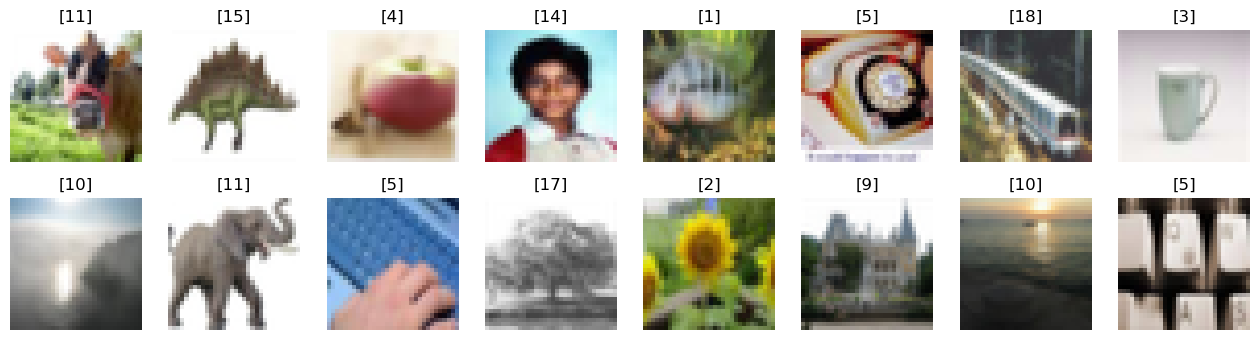

In [104]:
linhas  = 2
colunas = 8

fig, axs = plt.subplots(linhas, colunas, figsize=(16, 4))
# vetorizamos a imagem para que possamos indexá-la por um único inteiro, ao invés de referenciar uma posição na matriz do dataset. 
axs      = axs.flatten()

for i in range(linhas * colunas):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')

plt.show()

In [6]:
x_train, x_test = x_train/255, x_test/255

# (1.0) Definindo o modelo
O modelo MobileNetV2 é uma arquitetura de rede neural convolucional eficiente e compacta, projetada especialmente para dispositivos móveis e aplicações de baixa potência, onde o desempenho e a eficiência são críticos. Ele foi introduzido pela Google em 2018 como uma melhoria do MobileNetV1, trazendo maior precisão e eficiência computacional Para esta avaliação, vamos usar uma MobileNetV2.

In [19]:
mobileNet = tf.keras.applications.MobileNetV2((32, 32, 3), classes=20, weights=None)
mobileNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# (1.5) Treinando o modelo
Agora que o modelo está compilado, treine no conjunto de treinamento com 10 épocas e 32 de *batch*.

In [21]:
history_m1 = mobileNet.fit(x_train, y_train, epochs=20,
                          validation_data=(x_test, y_test),
                          batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 131ms/step - accuracy: 0.0563 - loss: 3.2383 - val_accuracy: 0.0500 - val_loss: 3.0067
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.0691 - loss: 3.0830 - val_accuracy: 0.0500 - val_loss: 3.0410
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 117ms/step - accuracy: 0.0767 - loss: 3.0265 - val_accuracy: 0.0479 - val_loss: 3.0606
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 117ms/step - accuracy: 0.0847 - loss: 2.9995 - val_accuracy: 0.0507 - val_loss: 3.0941
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 131ms/step - accuracy: 0.0880 - loss: 2.9670 - val_accuracy: 0.0724 - val_loss: 3.0191
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 121ms/step - accuracy: 0.0994 - loss: 2.9389 - val_accuracy: 0.0983 - val_loss: 2.9374
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 122ms/step - accuracy: 0.1028 - loss: 2.9144 - val_accuracy: 0.1050 - val_loss: 2.9468
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 222s 142ms/step - ac

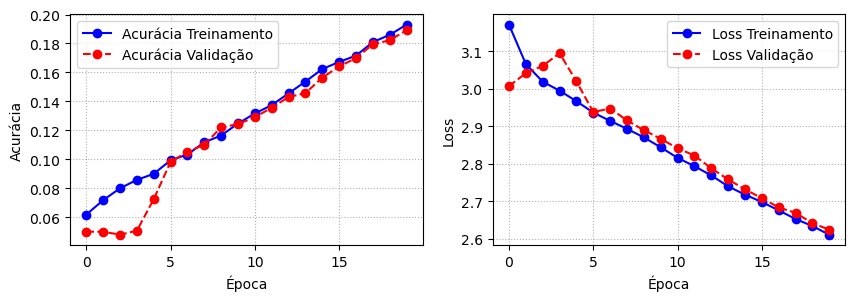

In [23]:
plot_resultados_modelo(history_m1)

If we add a pooling layer into the model 

In [7]:
coarseClassificationModel_with_avg_pooling = tf.keras.applications.MobileNetV2((32, 32, 3), classes=20, weights=None, pooling='avg')
coarseClassificationModel_with_avg_pooling.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
history_m2 = coarseClassificationModel_with_avg_pooling.fit(x_train, y_train, epochs=20,
                          validation_data=(x_test, y_test),
                          batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 110ms/step - accuracy: 0.0534 - loss: 3.2586 - val_accuracy: 0.0500 - val_loss: 3.0033
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 118ms/step - accuracy: 0.0660 - loss: 3.0971 - val_accuracy: 0.0500 - val_loss: 3.0290
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 117ms/step - accuracy: 0.0692 - loss: 3.0512 - val_accuracy: 0.0500 - val_loss: 3.0476
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.0792 - loss: 3.0178 - val_accuracy: 0.0535 - val_loss: 3.0534
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 117ms/step - accuracy: 0.0876 - loss: 2.9922 - val_accuracy: 0.0702 - val_loss: 3.0104
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.0896 - loss: 2.9700 - val_accuracy: 0.0918 - val_loss: 2.9546
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 122ms/step - accuracy: 0.0989 - loss: 2.9381 - val_accuracy: 0.0977 - val_loss: 2.9670
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 124ms/step - ac

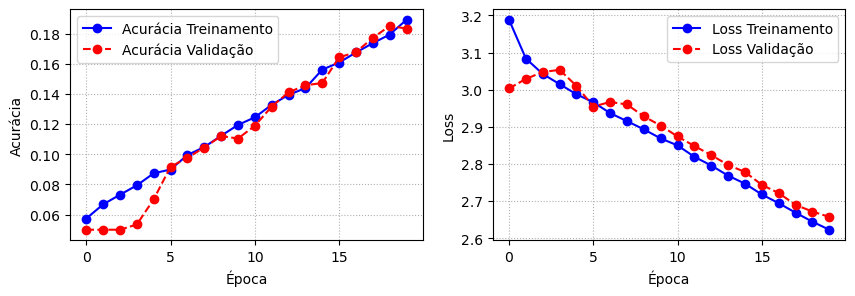

In [32]:
plot_resultados_modelo(history_m2)

We can modify pooling mechanism to analyze the impact on model training results

In [23]:
coarseClassificationModel_with_max_pooling = tf.keras.applications.MobileNetV2((32, 32, 3), classes=20, weights=None, pooling='max')
coarseClassificationModel_with_max_pooling.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [25]:
history_m3 = coarseClassificationModel_with_max_pooling.fit(x_train, y_train, epochs=20,
                          validation_data=(x_test, y_test),
                          batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 122ms/step - accuracy: 0.0556 - loss: 3.2690 - val_accuracy: 0.0500 - val_loss: 3.0105
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 216s 131ms/step - accuracy: 0.0684 - loss: 3.0853 - val_accuracy: 0.0500 - val_loss: 3.0614
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 236s 151ms/step - accuracy: 0.0770 - loss: 3.0282 - val_accuracy: 0.0500 - val_loss: 3.0826
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.0843 - loss: 3.0052 - val_accuracy: 0.0501 - val_loss: 3.0886
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 274s 175ms/step - accuracy: 0.0863 - loss: 2.9878 - val_accuracy: 0.0732 - val_loss: 3.0294
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 236s 151ms/step - accuracy: 0.0904 - loss: 2.9665 - val_accuracy: 0.0938 - val_loss: 2.9435
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 134ms/step - accuracy: 0.0958 - loss: 2.9424 - val_accuracy: 0.1044 - val_loss: 2.9434
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 135ms/step - ac

In [ ]:
plot_resultados_modelo(history_m3)

After some tests with a higher Adam learning rate, we have noticed that our training was not adapting so good to new data (overfit).

We can try to overcome impact of a higher learning rate by adding a callback on TensorFlow model definition with a decay learning rate, similar to what we learned in classes.

In [61]:
coarseClassificationModel_with_decay_learning_rate = tf.keras.applications.MobileNetV2((32, 32, 3), classes=20, weights=None, pooling='avg', classifier_activation='softmax')

# lr decay function
def lr_decay(epoch):
  return 0.007 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

coarseClassificationModel_with_decay_learning_rate.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [63]:
history_with_new_learning_rate_v2 = coarseClassificationModel_with_decay_learning_rate.fit(x_train, y_train, epochs=20,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=32)


Epoch 1: LearningRateScheduler setting learning rate to 0.007.
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 761s 410ms/step - accuracy: 0.0778 - loss: 3.3986 - val_accuracy: 0.0500 - val_loss: 3.0300 - learning_rate: 0.0070

Epoch 2: LearningRateScheduler setting learning rate to 0.004662.
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 518s 331ms/step - accuracy: 0.1532 - loss: 2.6683 - val_accuracy: 0.0818 - val_loss: 2.8734 - learning_rate: 0.0047

Epoch 3: LearningRateScheduler setting learning rate to 0.0031048920000000006.
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 220s 141ms/step - accuracy: 0.1772 - loss: 2.6038 - val_accuracy: 0.1159 - val_loss: 3.4812 - learning_rate: 0.0031

Epoch 4: LearningRateScheduler setting learning rate to 0.0020678580720000007.
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 130ms/step - accuracy: 0.1910 - loss: 2.5636 - val_accuracy: 0.1551 - val_loss: 4.1192 - learning_rate: 0.0021

Epoch 5: LearningRateScheduler setting learning rate to 0.001377193475952000

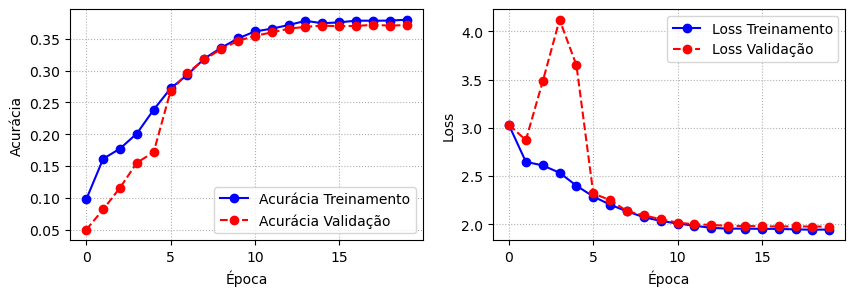

In [65]:
plot_resultados_modelo(coarseClassificationModel_with_decay_learning_rate)

It is clear that we had a better result along multiple epochs, still with a relative small accuracy (around 37% in validation) but it appears to be a very good progress.

Following we tried to raise this initial learning rate aiming to obtain a better final validation accuracy after 20 epochs.

In [10]:
coarseClassificationModel_with_decay_learning_rate_v2 = tf.keras.applications.MobileNetV2((32, 32, 3), classes=20, weights=None, pooling='avg', classifier_activation='softmax')

# lr decay function
def lr_decay(epoch):
  return 0.004 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

coarseClassificationModel_with_decay_learning_rate_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
import math

history_m4 = coarseClassificationModel_with_decay_learning_rate_v2.fit(x_train, y_train, epochs=20,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=32)


Epoch 1: LearningRateScheduler setting learning rate to 0.004.
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 153ms/step - accuracy: 0.0872 - loss: 3.3091 - val_accuracy: 0.0500 - val_loss: 3.0436 - learning_rate: 0.0040

Epoch 2: LearningRateScheduler setting learning rate to 0.002664.
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 121ms/step - accuracy: 0.1457 - loss: 2.6997 - val_accuracy: 0.0500 - val_loss: 3.1382 - learning_rate: 0.0027

Epoch 3: LearningRateScheduler setting learning rate to 0.0017742240000000002.
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 136ms/step - accuracy: 0.2058 - loss: 2.5091 - val_accuracy: 0.1653 - val_loss: 2.6805 - learning_rate: 0.0018

Epoch 4: LearningRateScheduler setting learning rate to 0.0011816331840000002.
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 129ms/step - accuracy: 0.2470 - loss: 2.3644 - val_accuracy: 0.2155 - val_loss: 2.9995 - learning_rate: 0.0012

Epoch 5: LearningRateScheduler setting learning rate to 0.000786967700544000

Now we can clearly see a situation in which we get a better accuracy, after 20 epochs, but a raising gap between validation and training results, indicating are model could be overfitting.

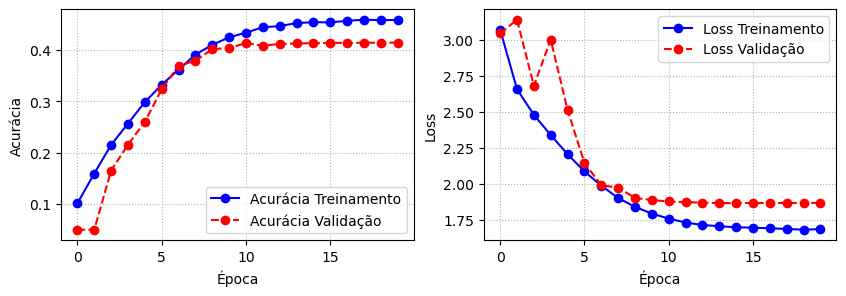

In [20]:
plot_resultados_modelo(history_m4)

# (1.5) Visualizando os resultados
Mostre os resultados do treinamento usando o histórico de treinamento (history), em termos de acurácia treinamento, acurácia validação, loss de treinamento e loss de validação.

In [18]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

 

##Prazo e Submissão

A avaliação é individual e a entrega deve ser feita até dia 08/11/2024 (Sexta, 23h59).